In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from keras_preprocessing.image import ImageDataGenerator
from sklearn import metrics
from tensorflow.keras.models import Sequential

In [ ]:
base_dir = 'flowers'

batch_size = 32
img_height = 224
img_width = 224

image_datagen = ImageDataGenerator(
    rescale=1. / 255,
    rotation_range=20,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    zoom_range=[0.8, 1.2],
    validation_split=0.2
)

train_generator = image_datagen.flow_from_directory(
    directory=base_dir,
    target_size=(img_height, img_width),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    subset="training",
    shuffle=True,
    seed=6
)

validation_generator = image_datagen.flow_from_directory(
    directory=base_dir,
    target_size=(img_height, img_width),
    color_mode="rgb",
    batch_size=batch_size,
    class_mode="categorical",
    subset="validation",
    shuffle=False,
    seed=6
)

Found 3457 images belonging to 5 classes.
Found 860 images belonging to 5 classes.


In [ ]:
model = Sequential()
model.add(Conv2D(filters=256, strides=1, kernel_size=(3, 3), activation='relu', input_shape=(img_height, img_width, 3,)))
model.add(MaxPooling2D(3, 3))
model.add(Conv2D(filters=256, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(3, 3))
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(3, 3))


model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(5, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [ ]:
step_size_train = train_generator.n // train_generator.batch_size
step_size_validation = validation_generator.n // validation_generator.batch_size

history = model.fit(
    train_generator,
    steps_per_epoch=step_size_train,
    epochs=30,
    shuffle=False,
    verbose=1,
    validation_data=validation_generator,
    validation_steps=step_size_validation
)

Epoch 1/50
108/108 [==============================] - 61s 507ms/step - loss: 1.4312 - acc: 0.3446 - val_loss: 1.2456 - val_acc: 0.4447
Epoch 2/50
108/108 [==============================] - 52s 480ms/step - loss: 1.2096 - acc: 0.4835 - val_loss: 1.1090 - val_acc: 0.5276
Epoch 3/50
108/108 [==============================] - 52s 480ms/step - loss: 1.1395 - acc: 0.5359 - val_loss: 1.1143 - val_acc: 0.5264
Epoch 4/50
108/108 [==============================] - 52s 481ms/step - loss: 1.0714 - acc: 0.5851 - val_loss: 1.0500 - val_acc: 0.5757
Epoch 5/50
108/108 [==============================] - 52s 481ms/step - loss: 0.9981 - acc: 0.6088 - val_loss: 0.9015 - val_acc: 0.6382
Epoch 6/50
108/108 [==============================] - 52s 481ms/step - loss: 0.9124 - acc: 0.6597 - val_loss: 0.9313 - val_acc: 0.6442
Epoch 7/50
108/108 [==============================] - 52s 479ms/step - loss: 0.8751 - acc: 0.6719 - val_loss: 0.8954 - val_acc: 0.6647
Epoch 8/50
108/108 [==============================] - 5

In [ ]:
#Visualize Training
def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history["val_" + string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, "val_" + string])
    plt.show()

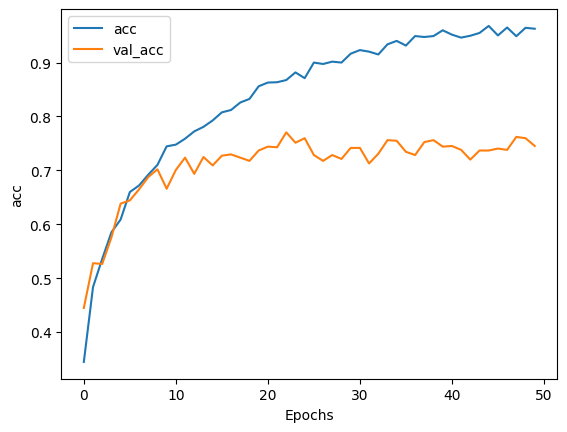

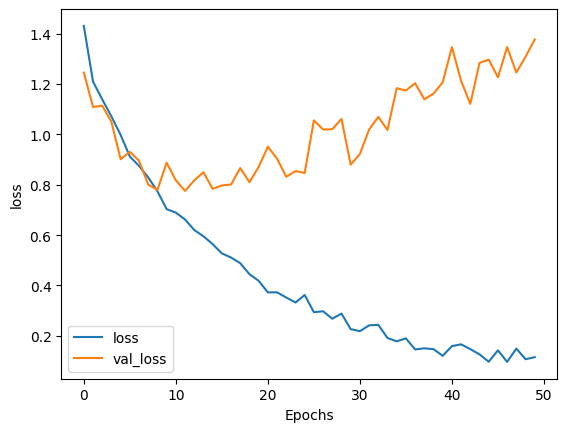

In [ ]:
plot_graphs(history, 'acc')
plot_graphs(history, 'loss')

In [ ]:
#test model
loss = model.evaluate(validation_generator, steps=validation_generator.n)
print("loss test: {:.2f}\n".format(loss[0]), "\raccuracy test: {:0.2f}".format(loss[1]))

860/860 [==============================] - 13s 14ms/step - loss: 1.4179 - acc: 0.7512
loss test: 1.42
accuracy test: 0.75


In [ ]:
#Confution Matrix
Y_pred = model.predict(validation_generator, step_size_validation // batch_size + 1)
y_pred = np.argmax(Y_pred, axis=1)
cm = metrics.confusion_matrix(validation_generator.classes, y_pred)

27/27 [==============================] - 11s 393ms/step


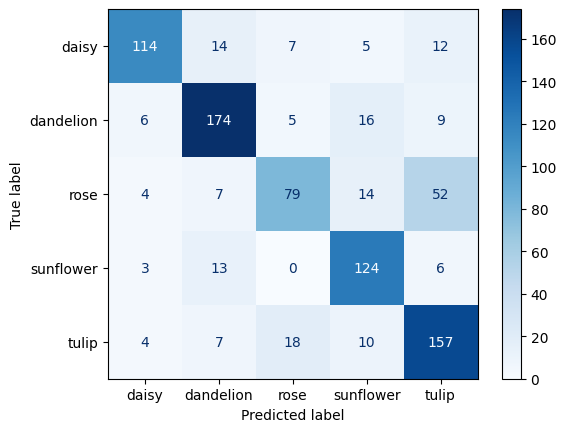

In [ ]:
class_labels = list(validation_generator.class_indices.keys())
disp = metrics.ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot(cmap=plt.cm.Blues)
plt.show()

In [ ]:
results = model.predict(validation_generator, steps=validation_generator.n)
predicted_classes = np.argmax(results, axis=1)
true_classes = validation_generator.classes
class_labels = list(validation_generator.class_indices.keys())
report = metrics.classification_report(true_classes, predicted_classes, target_names=class_labels)

860/860 [==============================] - 12s 13ms/step


In [ ]:
print(report)

              precision    recall  f1-score   support

       daisy       0.86      0.76      0.81       152
   dandelion       0.77      0.82      0.80       210
        rose       0.79      0.47      0.59       156
   sunflower       0.73      0.82      0.77       146
       tulip       0.65      0.82      0.73       196

    accuracy                           0.75       860
   macro avg       0.76      0.74      0.74       860
weighted avg       0.76      0.75      0.74       860
